In [1]:
#importing the libraries required

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [121]:
#importing the dataset
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [122]:
#getting the shape of the training and test set variables
X_train.shape

(50000, 32, 32, 3)

In [123]:
X_test.shape

(10000, 32, 32, 3)

In [124]:
y_train.shape

(50000, 1)

In [125]:
y_test.shape

(10000, 1)

[4]


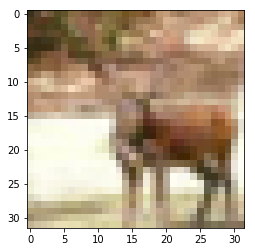

In [126]:
#step 2 visulaising the data and checking
i = 1001
plt.imshow(X_train[i])
print(y_train[i])

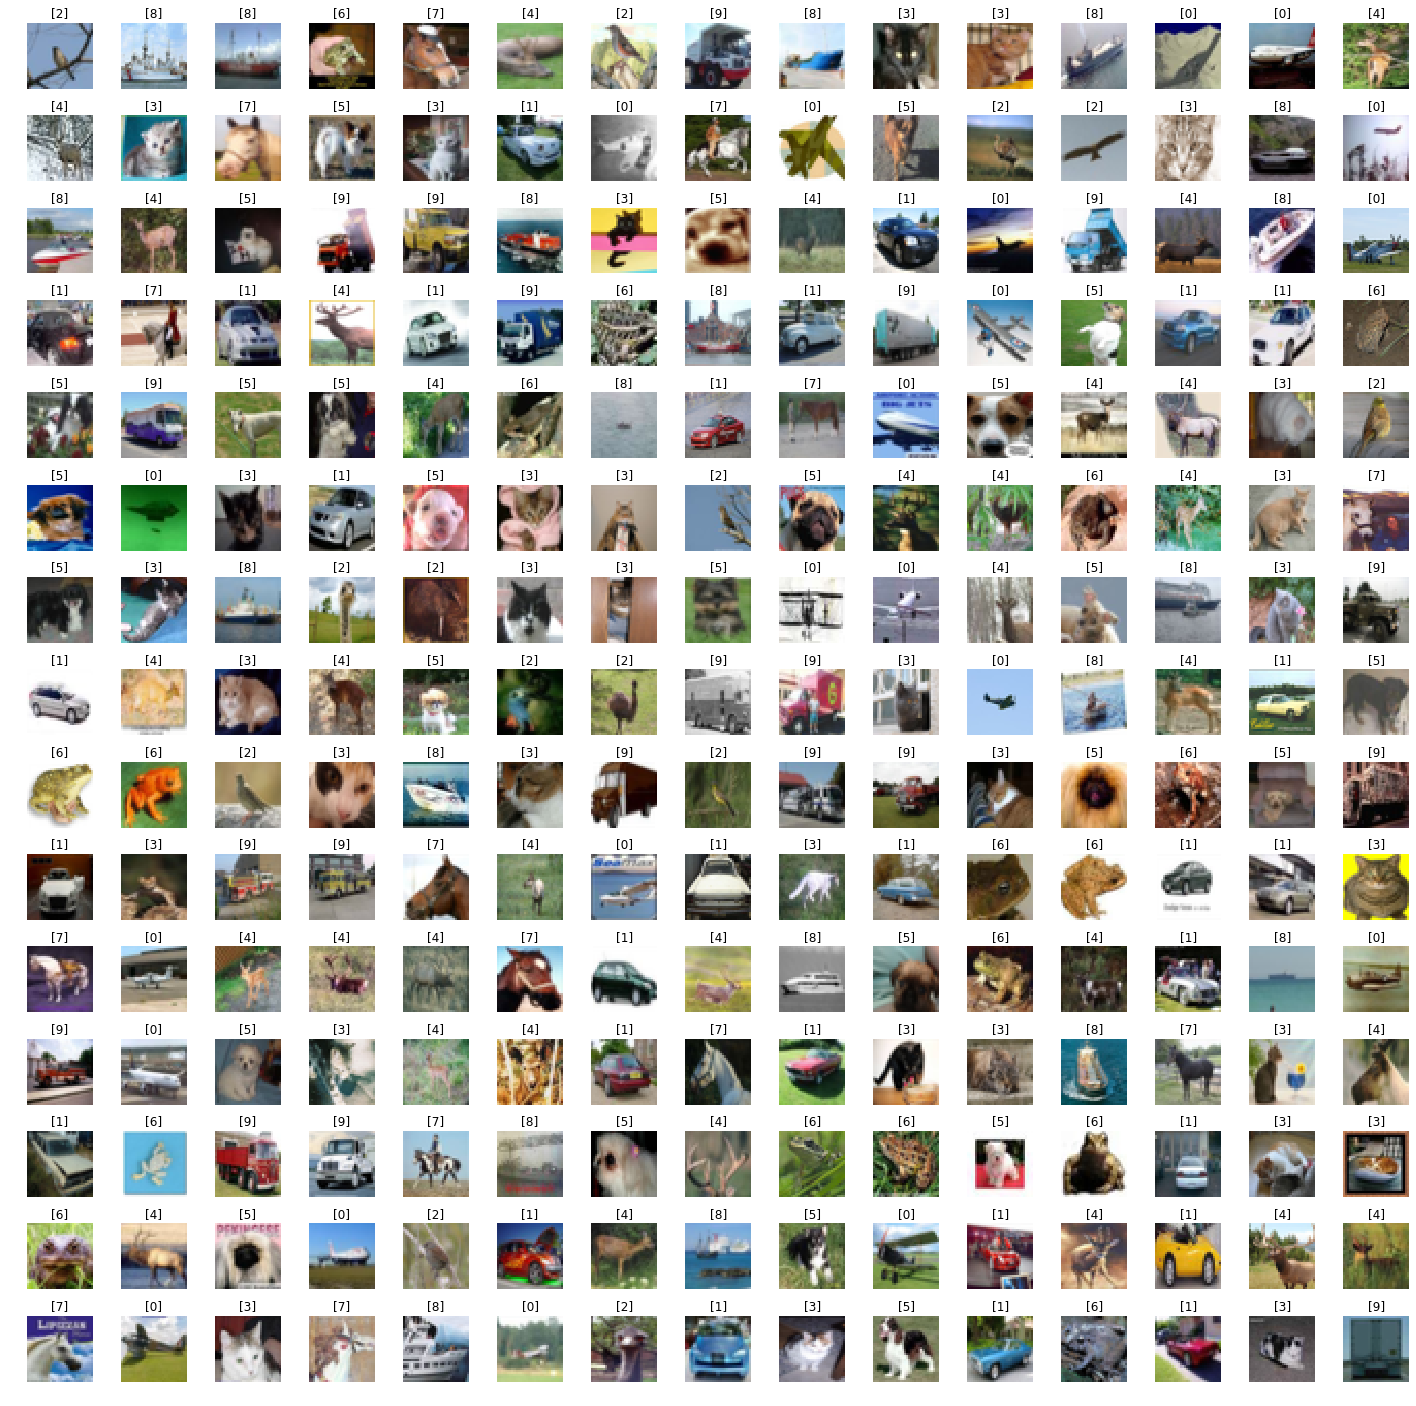

In [127]:
#creating a matrix of pictures
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

#creating a for loop to plot an image
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [128]:
#step 3 data preparation

In [129]:
#convert actual images into float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
number_cat = 10 #number of categories

In [130]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [131]:
import keras
#converting y decimal values into binaries
y_train = keras.utils.to_categorical(y_train, number_cat)

In [132]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [133]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [134]:
#converting y_test into binary values
y_test = keras.utils.to_categorical(y_test, number_cat)

In [135]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [136]:
#normalising the values
X_train = X_train/255
X_test = X_test/255

In [137]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [138]:
X_train.shape

(50000, 32, 32, 3)

In [139]:
#getting the dimension of the image
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [140]:
#step 4 training the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [141]:
#building the model

In [142]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

In [143]:
#adding extra convolution layers

In [144]:
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))

In [145]:
#creating fully connected neurons
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

In [146]:
#building the output layer

In [147]:
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [148]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [149]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle =  True)

Epoch 1/2
50000/50000 [==============================] - 176s 4ms/step - loss: 1.5488 - acc: 0.4400
Epoch 2/2
50000/50000 [==============================] - 179s 4ms/step - loss: 1.1269 - acc: 0.6048


In [150]:
#step 5 evaluating the model created

In [151]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 10s 951us/step
Test Accuracy: 0.6648


In [152]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 0, 7])

In [153]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [154]:
y_test = y_test.argmax(1)

In [155]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

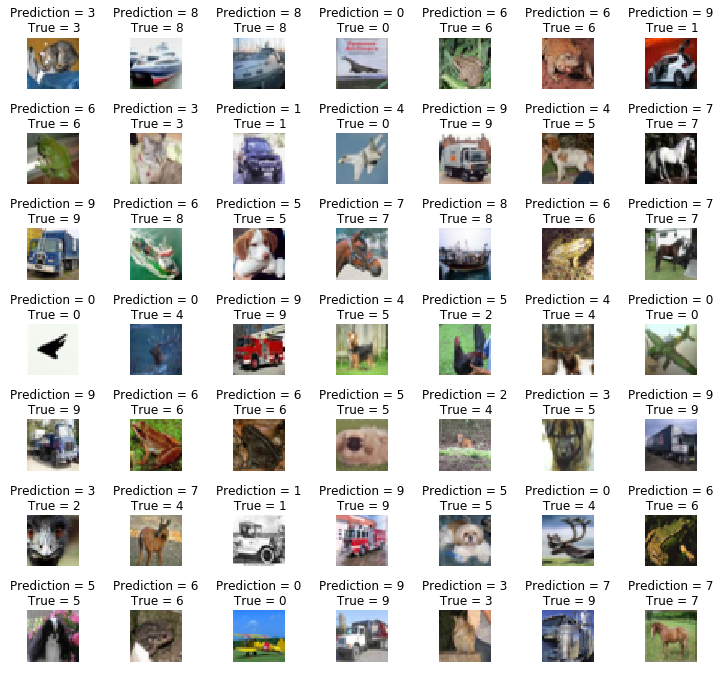

In [156]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

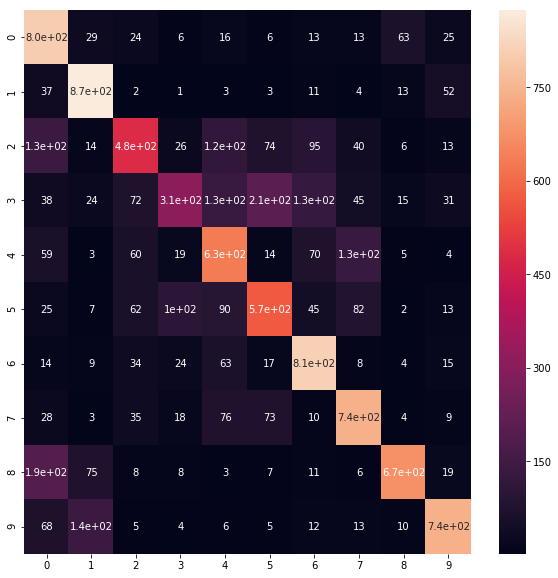

In [157]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)
#rows = model , columns = true 

In [158]:
#step 6 saving the model

In [159]:
import os

directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_CIFAR-10_trained_model.h5')
cnn_model.save(model_path)

In [113]:
#using augmentation to increase the accuracy of the model
#augmentation means we are increasing the variations in the images by enlarging them rotating them etc

In [114]:
import keras 
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [115]:
X_train.shape

(50000, 32, 32, 3)

In [116]:
n = 8
X_train_samples = X_train[:n]
X_train_samples.shape

(8, 32, 32, 3)

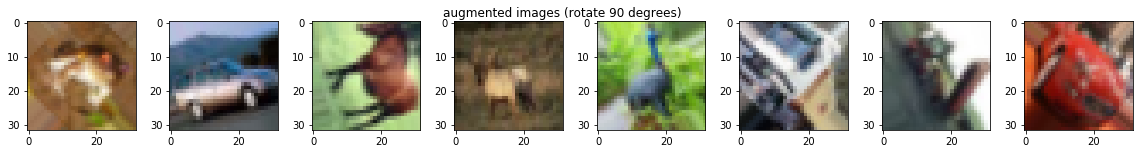

In [70]:
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rotation_range = 90)
#datagen_train = ImageDataGenerator(vertical_flip = True)
#datagen_train = ImageDataGenerator(height_shift_range = 0.5)
#datagen_train = ImageDataGenerator(brightness_range = (1, 5))
datagen_train.fit(X_train)


from PIL import Image

fig = plt.figure(figsize = (20,2))
for x_batch in datagen_train.flow(X_train_samples, batch_size = n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
    fig.suptitle('augmented images (rotate 90 degrees)')
    plt.show()
    break;

In [68]:
# step 7.2 model training using augmented dataset

In [168]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [169]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2, steps_per_epoch = 10000)

Epoch 1/2
 1351/10000 [===>..........................] - ETA: 15:28 - loss: 1.6705 - acc: 0.4012

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)